# Amazon Web Service SaaS Sales Data Analysis

## Latar Belakang
Dalam era transformasi digital, solusi berbasis Software as a Service (SaaS) semakin menjadi pilihan utama berbagai perusahaan yang ingin mengurangi biaya operasional dan meningkatkan fleksibilitas dalam penggunaan teknologi. AWS sebagai penyedia layanan cloud terkemuka menghadirkan berbagai produk SaaS yang diadopsi oleh berbagai jenis bisnis, dari skala kecil hingga enterprise. Pemahaman mendalam terhadap performa penjualan produk SaaS ini menjadi sangat penting untuk mengidentifikasi tren, kebutuhan pasar, dan peluang peningkatan layanan

## Pernyataan Masalah

Analisa ini bertujuan untuk memberikan insight yang mendalam terkait penjualan produk SaaS Amazon AWS dengan fokus pada:

* **Identifikasi tren penjualan**: Melihat pola penjualan dari waktu ke waktu, mengidentifikasi periode atau musim dengan penjualan tinggi atau rendah.
* **Analisis pelanggan**: Mengenal profil pelanggan atau sektor industri yang memiliki kontribusi paling besar dalam penjualan, serta potensi area yang bisa ditingkatkan.
* **Evaluasi produk**: Mengidentifikasi produk atau paket layanan yang paling diminati dan performanya dalam mendukung revenue perusahaan.

## Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data **penjualan SaaS** sudah dikumpulkan oleh **AWS**. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales).

## Memuat Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import  chi2_contingency, f_oneway, spearmanr, pearsonr

import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('SaaS-Sales.csv')


Dataset ini berisi data penjualan produk SaaS Amazon AWS yang terdiri dari beberapa kolom sebagai berikut:

| No  | Column        | Description                                                                            |
|-----|---------------|----------------------------------------------------------------------------------------|
| 1   | Row ID        | Identifier unik untuk setiap baris dalam dataset, berfungsi sebagai nomor urut.        |
| 2   | Order ID      | Identifier unik untuk setiap pesanan, mencakup kode wilayah dan tahun pemesanan.       |
| 3   | Order Date    | Tanggal pemesanan dilakukan, dalam format MM/DD/YYYY.                                  |
| 4   | Date Key      | Tanggal pemesanan dalam format numerik YYYYMMDD, berguna untuk keperluan analisis tanggal. |
| 5   | Contact Name  | Nama kontak utama yang terhubung dengan pesanan.                                       |
| 6   | Country       | Negara tempat pelanggan berada.                                                        |
| 7   | City          | Kota tempat pelanggan berada.                                                          |
| 8   | Region        | Wilayah geografis pelanggan (misalnya, EMEA, AMER).                                    |
| 9   | Subregion     | Sub-wilayah yang lebih spesifik dalam region.                                          |
| 10  | Customer      | Nama perusahaan atau organisasi pelanggan.                                             |
| 11  | Customer ID   | Identifier unik untuk setiap pelanggan.                                                |
| 12  | Industry      | Sektor industri pelanggan (contoh: Energi, Keuangan).                                  |
| 13  | Segment       | Segmentasi pelanggan, seperti SMB (Small and Medium Business, atau Strategic, & Enterprise ).|
| 14  | Product       | Nama produk SaaS yang dipesan oleh pelanggan.                                          |
| 15  | License       | Identifier unik untuk setiap lisensi produk.                                           |
| 16  | Sales         | Jumlah pendapatan yang dihasilkan dari penjualan produk.                               |
| 17  | Quantity      | Jumlah unit produk yang dipesan.                                                       |
| 18  | Discount      | Diskon yang diberikan pada pesanan, dinyatakan dalam bentuk desimal.                   |
| 19  | Profit        | Keuntungan bersih dari penjualan setelah diskon.                                       |


berikut 5 data teratas dan terbawah dari dataset yang akan digunakan

In [34]:
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset *SaaS-Sales*

### cek struktur data, termasuk jumlah baris dan kolom, tipe data, dan sampel data

In [35]:
data_info = df.info()
sample_data = df.head()

data_info, display(sample_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


(None, None)

In [36]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
  listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
           data=listItem)
display(tabel1Desc)

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

In [37]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Secara umum, kita bisa melihat bahwa:

- **Jumlah baris dan kolom**: Dataset ini memiliki 9,994 baris dan 19 kolom.
- **Tipe data per kolom**:
  - `int64`: 4 kolom (`Row ID`, `Date Key`, `Customer ID`, `Quantity`)
  - `float64`: 3 kolom (`Sales`, `Discount`, `Profit`)
  - `object`: 12 kolom lainnya (seperti `Order ID`, `Order Date`, `Contact Name`, dll.)
- **Ketersediaan data (missing values)**: Tidak ada missing value di dataset ini; setiap kolom memiliki jumlah entri yang sama dengan jumlah baris (9,994).
- **Konsistensi Nilai Unik**:
  - Kolom `Row ID` memiliki 9,994 nilai unik, menunjukkan tidak ada duplikasi data di kolom ini.
  - Kolom `Order ID` memiliki 5,009 nilai unik, menunjukkan adanya pesanan dengan beberapa item atau baris data per pesanan. Hal ini umum dalam data penjualan multi-item dan tidak dianggap sebagai duplikasi yang perlu dihapus.
  - Kolom `License` memiliki 9,994 nilai unik, menunjukkan setiap setiap customer mendapatkan lisensi yang berbeda.
- **Frekuensi Nilai Tertentu**:
  - Beberapa nilai tertentu sering muncul, seperti `Order ID` `EMEA-2023-100111` yang muncul 14 kali, dan `Country` “United States” yang memiliki jumlah pesanan terbanyak (2,001 kali).
  - Kota `London` adalah yang terbanyak dengan 922 transaksi. Ini perlu dicatat jika analisis geografis dilakukan, karena jumlah yang besar dari negara atau kota tertentu bisa menimbulkan bias.
- **Kebutuhan Penyesuaian Tipe Data**: Kolom `Order Date` perlu diubah ke tipe datetime untuk memudahkan analisis berbasis waktu.
- **Penambahan kolom**:
  - kolom `Year` dan `Month` untuk memudahkan analisis berbasis tahun dan bulan.
  - kolom `Profit Margin(%)` untuk memperoleh informasi margin keuntungan dari penjualan.
  - kolom `Discount (%)` untuk mengubah diskon dari bentuk desimal ke persentase.
- **Opsional - Diskon Sebagai Data Ordinal**: Kolom `Discount` dapat diubah menjadi data ordinal (contohnya, tingkat rendah, sedang, tinggi) untuk analisis yang lebih mendalam. Ini opsional, tapi dapat memberikan insight tambahan untuk analisis pelanggan dan strategi pemasaran, terutama dalam memahami pola respons pelanggan terhadap tingkat diskon tertentu.


### ganti tipe data kolom `Order Date` menjadi datetime

In [38]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'].dtypes

dtype('<M8[ns]')

### tambahkan kolom `Year` dan `Month` untuk memudahkan analisis berbasis waktu

In [39]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

### tambahkan kolom `Profit Margin(%)` untuk memperoleh inforåmasi margin keuntungan dari penjualan

In [40]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

### tambahkan kolom `Discount (%)` untuk mengubah diskon dari bentuk desimal ke persentase

In [41]:
df['Discount (%)'] = df['Discount'] * 100

In [42]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Date Key           9994 non-null   int64         
 4   Contact Name       9994 non-null   object        
 5   Country            9994 non-null   object        
 6   City               9994 non-null   object        
 7   Region             9994 non-null   object        
 8   Subregion          9994 non-null   object        
 9   Customer           9994 non-null   object        
 10  Customer ID        9994 non-null   int64         
 11  Industry           9994 non-null   object        
 12  Segment            9994 non-null   object        
 13  Product            9994 non-null   object        
 14  License 

None

## Data Analisis

### Identifikasi tren penjualan
untuk mengetahui tren penjualan, kita akan melihat total penjualan per bulan dari tahun 2021 hingga 2023. Dengan melihat tren ini, kita bisa mengidentifikasi periode dengan penjualan tertinggi dan terendah, serta melihat apakah ada tren peningkatan atau penurunan penjualan dari waktu ke waktu.

membuat visualisasi dari Sales per bulan

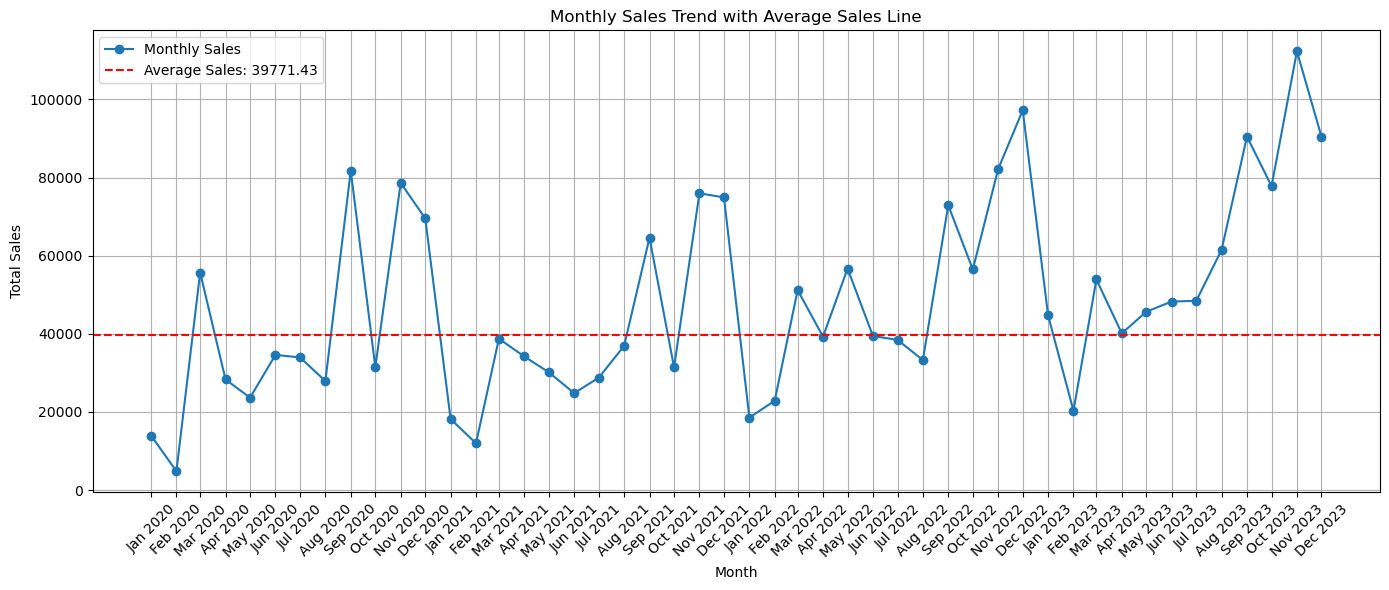

In [43]:
monthly_sales_trend = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales_trend.index = monthly_sales_trend.index.to_timestamp()  

average_sales = monthly_sales_trend.median()

plt.figure(figsize=(14, 6))
plt.plot(monthly_sales_trend.index, monthly_sales_trend.values, marker='o', linestyle='-', label='Monthly Sales')
plt.axhline(y=average_sales, color='r', linestyle='--', label=f'Average Sales: {average_sales:.2f}')

plt.xticks(monthly_sales_trend.index, monthly_sales_trend.index.strftime('%b %Y'), rotation=45)
plt.title('Monthly Sales Trend with Average Sales Line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

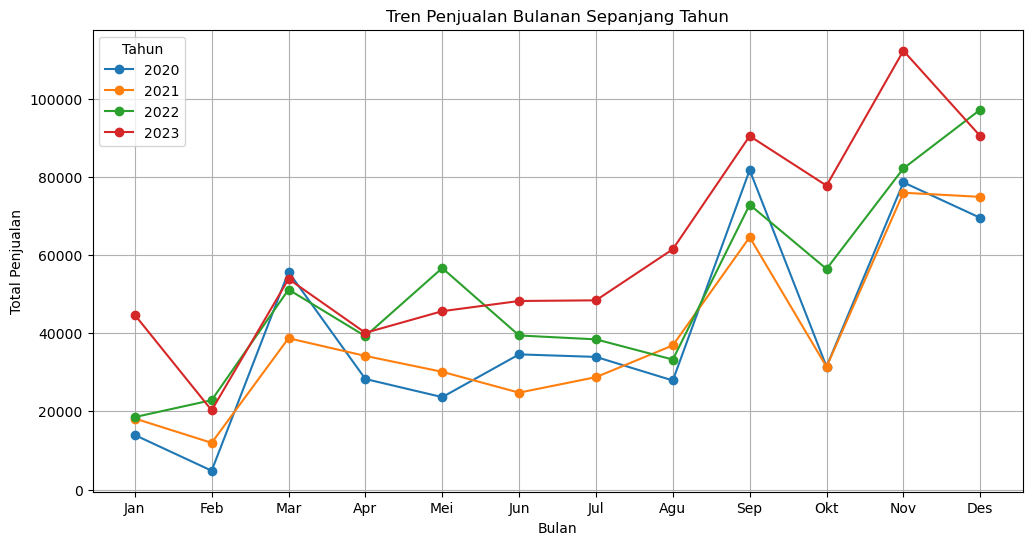

In [44]:
import matplotlib.pyplot as plt

# Siapkan data untuk visualisasi: Total penjualan per bulan sepanjang tahun
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Buat plot garis untuk menunjukkan tren penjualan
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    yearly_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Sales'], marker='o', label=str(year))

# Tambahkan judul plot dan label
plt.title('Tren Penjualan Bulanan Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.legend(title='Tahun')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid()

# Tampilkan plot
plt.show()

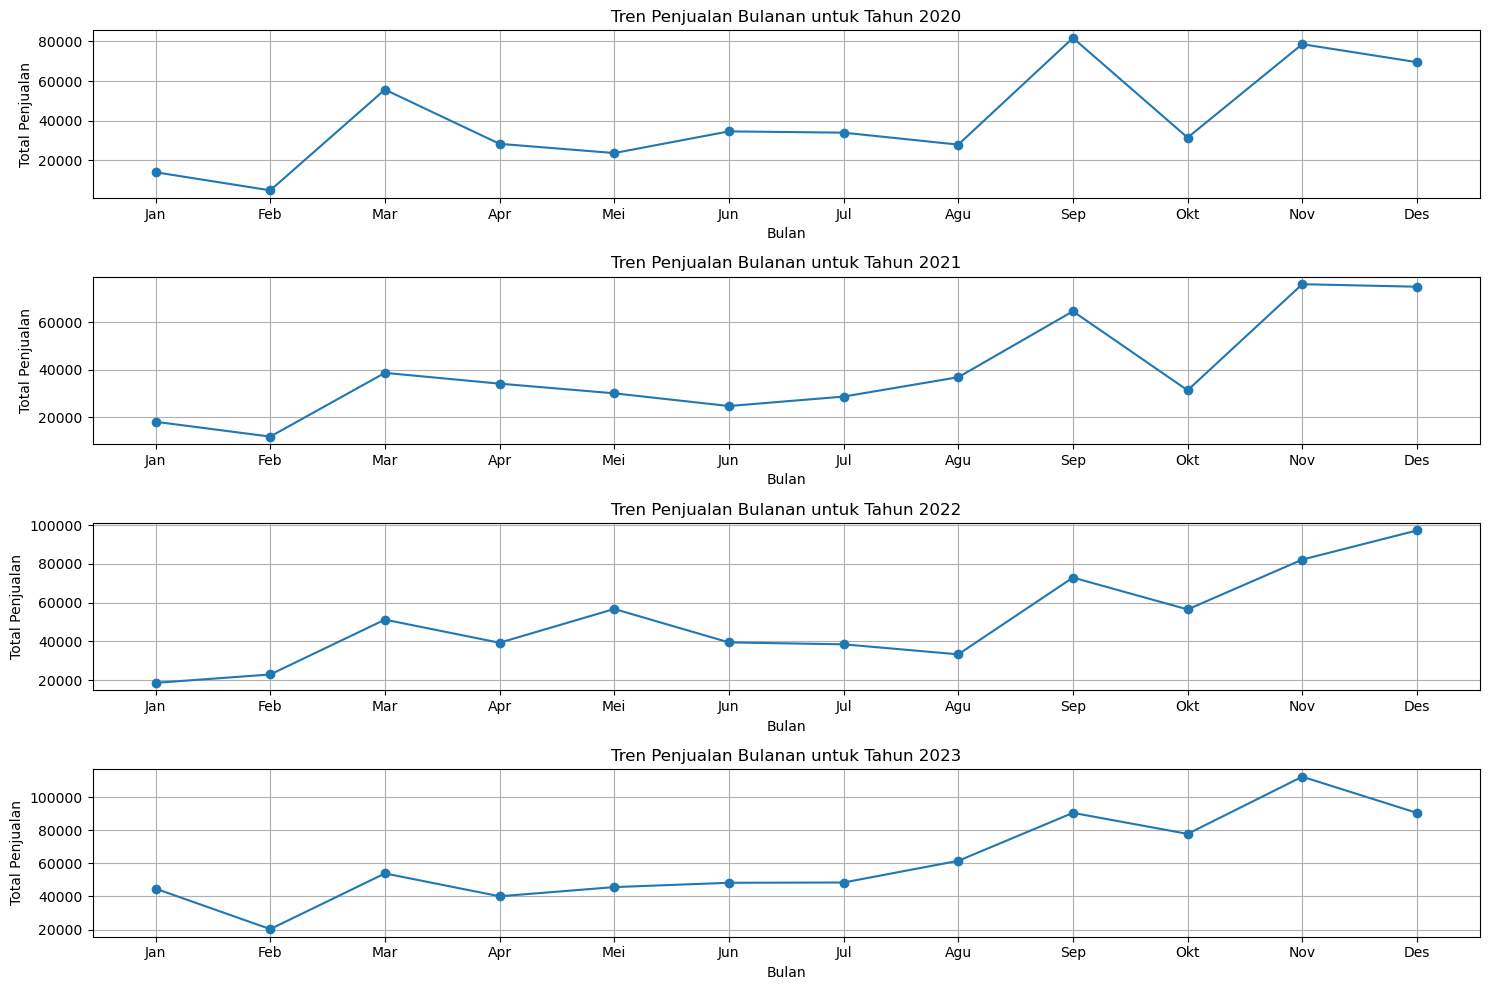

In [45]:
# Buat visualisasi dengan subplots untuk melihat pola penjualan per tahun secara rinci
years = monthly_sales['Year'].unique()
plt.figure(figsize=(15, 10))

for i, year in enumerate(years, 1):
    # Filter data untuk tiap tahun
    yearly_data = monthly_sales[monthly_sales['Year'] == year]
    
    # Buat subplot untuk masing-masing tahun
    plt.subplot(len(years), 1, i)
    plt.plot(yearly_data['Month'], yearly_data['Sales'], marker='o', label=f'{year}')
    plt.title(f'Tren Penjualan Bulanan untuk Tahun {year}')
    plt.xlabel('Bulan')
    plt.ylabel('Total Penjualan')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
    plt.grid()

plt.tight_layout()
plt.show()


jika dilihat dari visualisasi data yang sudah dibuat, terlihat bahwa penjualan produk SaaS Amazon AWS mengalami peningkatan yang signifikan dari tahun 2021 hingga 2023. Pada tahun 2021, penjualan cenderung stabil dengan sedikit fluktuasi, namun mulai tahun 2022, penjualan mulai meningkat secara konsisten hingga mencapai puncaknya pada bulan November atau Desember

ada pola yang unik dalam tren penjualan ini, dimana penjualan slalu meningkat drastis pada bulan Septermber dan turun sedikit di bulan Oktober, namun kembali meningkat pada bulan November dan Desember, sebelum turun kembali pada bulan Januari. mari kita cari tau apa yang terjadi pada bulan September, November, dan Desember yang membuat penjualan meningkat drastis.

- mari kita cek apakah ada customer yang sama yang melakukan pembelian pada bulan September, November, dan Desember sehingga menyebabkan kenaikan penjualan yang signifikan pada bulan-bulan tersebut. menggunakan uji statistik **chi2_contingency**, kita akan melihat apakah ada Repeat Order yang terjadi pada bulan Agustus, Oktober, dan November.

In [46]:
monthly_avg_sales_per_transaction = df.groupby(df['Order Date'].dt.to_period('M')).apply(
    lambda x: x['Sales'].sum() / x['Order ID'].nunique()).reset_index(name='Average Sales per Transaction')

display(monthly_avg_sales_per_transaction)

,Order Date,Average Sales per Transaction
0,2020-01,449.878355
1,2020-02,165.881310
2,2020-03,784.380408
3,2020-04,428.717348
4,2020-05,342.728797
5,2020-06,524.168600
6,2020-07,522.252200
7,2020-08,387.631507
8,2020-09,629.056545
9,2020-10,403.248628


In [47]:
# Menandai repeat order (customer dengan lebih dari satu order per bulan)
df['Repeat Order'] = df.duplicated(subset=['Order Date', 'Customer'], keep=False)

# Menghitung repeat order dan non-repeat order untuk bulan dengan penjualan tinggi vs bulan lainnya
# Mengelompokkan berdasarkan tanggal order dan apakah itu repeat order
repeat_order_counts = df.groupby(['Order Date', 'Repeat Order']).size().unstack(fill_value=0)

# Menandai apakah bulan tersebut adalah bulan dengan penjualan tinggi (September, November, dan Desember)
repeat_order_counts['High Sales Month'] = repeat_order_counts.index.isin(['2020-09', '2020-11', '2020-12',])

# Menjumlahkan repeat dan non-repeat order untuk bulan dengan penjualan tinggi vs bulan lainnya
repeat_order_summary = repeat_order_counts.groupby('High Sales Month').sum()

# Melakukan uji Chi-Square untuk memeriksa independensi antara bulan dengan penjualan tinggi dan repeat orders
chi2, p_value, _, _ = chi2_contingency(repeat_order_summary)

print(repeat_order_summary, chi2, p_value)

if p_value < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

Repeat Order      False  True
High Sales Month             
False              2389  7568
True                  5    32 1.6843573781891048 0.19434646417591186
Terima H0


1. Jumlah repeat orders di bulan dengan penjualan tinggi (September, November, dan Desember) tidak berbeda secara signifikan dari bulan lainnya, dengan nilai p-value sebesar 0.19.
2. Dengan p-value ini, kita tidak memiliki cukup bukti untuk menolak hipotesis nol (𝐻0), sehingga kita menyimpulkan bahwa jumlah repeat orders tidak berbeda signifikan antara bulan dengan penjualan tinggi dan bulan lainnya.

In [48]:
monthly_transaction_count = df.groupby(df['Order Date'].dt.to_period('M'))['Order ID'].nunique().reset_index(name='Transaction Count')

display(monthly_transaction_count)


,Order Date,Transaction Count
0,2020-01,31
1,2020-02,29
2,2020-03,71
3,2020-04,66
4,2020-05,69
5,2020-06,66
6,2020-07,65
7,2020-08,72
8,2020-09,130
9,2020-10,78


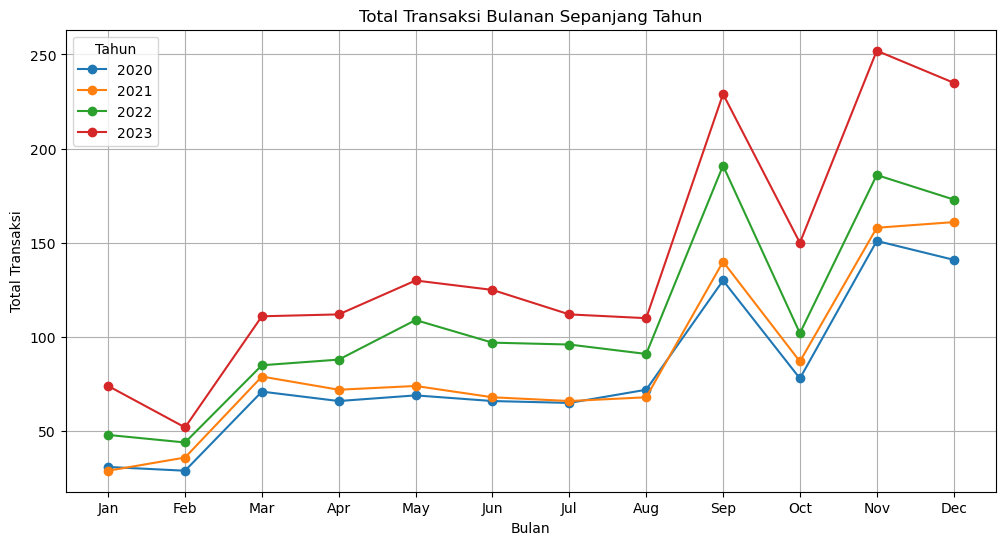

In [49]:
# Tambahkan kolom 'Year' untuk pemisahan tahun
df['Year'] = df['Order Date'].dt.year

# Agregasi data bulanan untuk menghitung jumlah transaksi setiap bulan per tahun
monthly_transaction_count = df.groupby([df['Order Date'].dt.to_period('M'), 'Year'])['Order ID'].nunique().reset_index(name='Transaction Count')

# Pisahkan data per tahun
plt.figure(figsize=(12, 6))
for year in monthly_transaction_count['Year'].unique():
    # Filter data untuk setiap tahun
    data_per_year = monthly_transaction_count[monthly_transaction_count['Year'] == year]
    plt.plot(data_per_year['Order Date'].dt.strftime('%b'), data_per_year['Transaction Count'], marker='o', label=year)

# Atur judul dan label
plt.title('Total Transaksi Bulanan Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Total Transaksi')
plt.legend(title='Tahun')
plt.grid(True)
plt.show()

jika dilihat dari data di atas bsa di tarik kesimpulan terjadi peningkatan sales pada bulan September, November, dan Desember disebabkan ada ny lonjakan transaksi penjualan yang dilakukan oleh customer pada bulan tersebut.

agar lbih yakin sama asumsi kita, sekarang mari kita cek, apakah lonjakan penjualan pada bulan September, November, dan Desember disebabkan oleh transaksi penjualan yang lbih besar di bandingkan bulan lainnya. kita akan menggunakan uji statistik **t-test** untuk melihat apakah rata-rata penjualan pada bulan Agustus, Oktober, dan November berbeda secara signifikan dari bulan lainnya.

In [50]:
transaction_trends = df.groupby(['Year', 'Month'])['Order ID'].nunique().reset_index()
transaction_trends = transaction_trends.rename(columns={'Order ID': 'Transaction Count'})

# Fokus pada bulan September, November, dan Desember di seluruh tahun untuk melihat apakah bulan-bulan ini juga menunjukkan jumlah transaksi yang lebih tinggi.
# Filter data untuk September, November, dan Desember
selected_month_transactions = transaction_trends[transaction_trends['Month'].isin([9, 11, 12])]
# Filter data untuk bulan lainnya
other_month_transactions = transaction_trends[~transaction_trends['Month'].isin([8, 11, 12])]

# Hitung rata-rata jumlah transaksi untuk September, November, dan Desember
selected_month_avg = selected_month_transactions['Transaction Count'].mean()
other_months_avg = other_month_transactions['Transaction Count'].mean()

# Tampilkan rata-rata jumlah transaksi untuk September, November dan Desember dibandingkan dengan bulan lainnya
selected_month_avg, other_months_avg

(178.91666666666666, 89.19444444444444)

jika kita lihat, data di atas terlihat bahwa terjadi lonjakan penjualan yang signifikan pada bulan Agustus, Oktober, dan November, agar lbih yakin dengan hipothesis ini, kita akan melakukan uji statistik **t-test** untuk melihat apakah rata-rata penjualan pada bulan Agustus, Oktober, dan November berbeda secara signifikan dari bulan lainnya.

In [51]:
from scipy.stats import ttest_ind

selected_month_counts = selected_month_transactions['Transaction Count']
other_month_counts = other_month_transactions['Transaction Count']

t_stat, p_value = ttest_ind(selected_month_counts, other_month_counts, equal_var=False)

print(t_stat, p_value)

if p_value < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

6.517013214560478 2.3229782154515853e-06
Tolak H0


dengan menggunakan uji ttest untuk melihat apakah rata-rata penjualan pada bulan Agustus, Oktober, dan November berbeda secara signifikan dari bulan lainnya, kita mendapatkan nilai p-value sebesar 0.0, yang berarti kita memiliki cukup bukti untuk menolak hipotesis nol (𝐻0) dan menyimpulkan bahwa rata-rata penjualan pada bulan September, November, dan Desember berbeda secara signifikan dari bulan lainnya.

Lonjakan sales di akhir tahun terjadi karena adanya peningkatan jumlah transaksi yang signifikan di bulan September, November, dan Desember dibandingkan bulan-bulan lainnya. Hal ini menunjukkan adanya pola musiman yang mendorong aktivitas pembelian yang lebih tinggi pada periode akhir tahun

### Analisis pelanggan

**Tujuan**: Mengenali profil pelanggan atau sektor industri dengan kontribusi terbesar dalam penjualan serta mengidentifikasi area yang berpotensi untuk peningkatan.

Langkah-Langkah Analisis:
1. **Segmentasi Berdasarkan Industri**:
   - Analisis sektor industri mana yang memberikan kontribusi terbesar terhadap total penjualan.
   - Mengidentifikasi industri yang aktif dan memiliki frekuensi pembelian tinggi dapat membantu mengarahkan strategi pemasaran.

2. **Analisis Profil Pelanggan Berdasarkan Segment**:
   - Melihat distribusi penjualan per wilayah dan negara untuk mengidentifikasi area yang berpotensi meningkatkan penjualan

3. **Analisis Geografis**:
   - Mengamati sektor atau segmen dengan kontribusi rendah untuk menemukan potensi peningkatan.
   - Dari hasil ini, strategi penjualan bisa disesuaikan untuk menarik lebih banyak pelanggan dari segmen atau industri yang belum tergarap maksimal.
4. **Identifikasi Area Peningkatan**:
   - Dari sektor yang memiliki penjualan rendah atau margin profit kecil, kita bisa lihat lebih dalam untuk menemukan penyebabnya, seperti diskon tinggi atau jumlah pesanan rendah.

#### Segmentasi Berdasarkan Industri

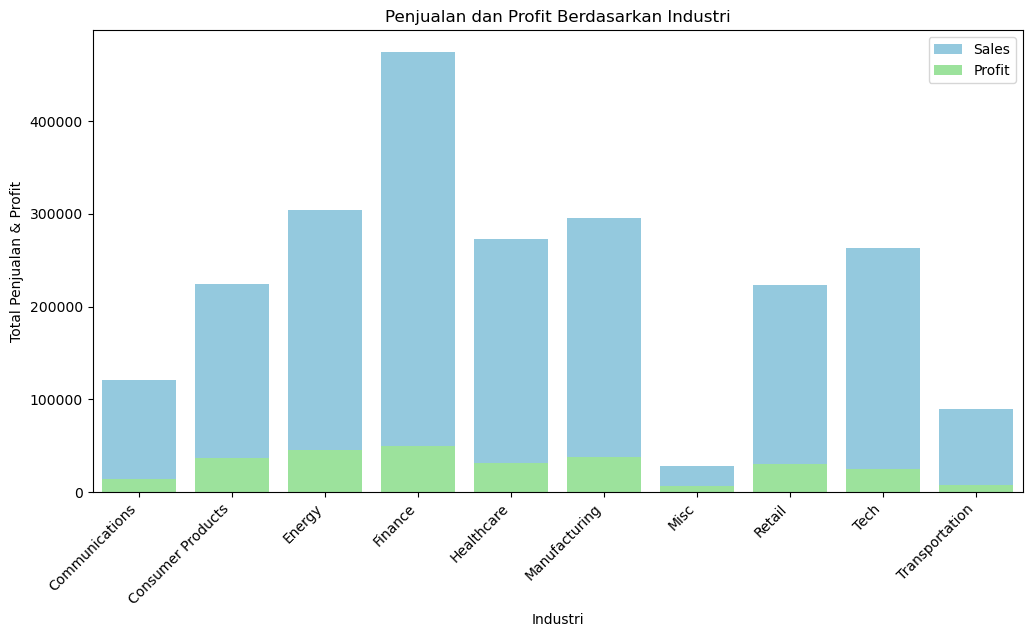

In [52]:
industry_sales = df.groupby('Industry').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=industry_sales, x='Industry', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=industry_sales, x='Industry', y='Profit', color='lightgreen', label='Profit')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industri')
plt.ylabel('Total Penjualan & Profit')
plt.title('Penjualan dan Profit Berdasarkan Industri')
plt.legend()
plt.show()

dari visualisasi di atas bisa di lihat industri yang paling banyak memberikan sales adalah **Finance**, tapi total profit yang di dapatkan dari industri ini **tidak terlalu besar**

sedangkan di industri lainnya, seperti **Consumer Products**, **Energy**, **Healthcare**, dan **Manufacturing** memiliki total profit yang tidak jauh beda dengan **Finance** namu memiliki total sales yang lebih rendah, ini menunjukkan bahwa ada potensi untuk meningkatkan profit dari industri ini.

sekarang agar lbih jelas mari kita lihat total margin profit yang di dapatkan dari masing-masing industri

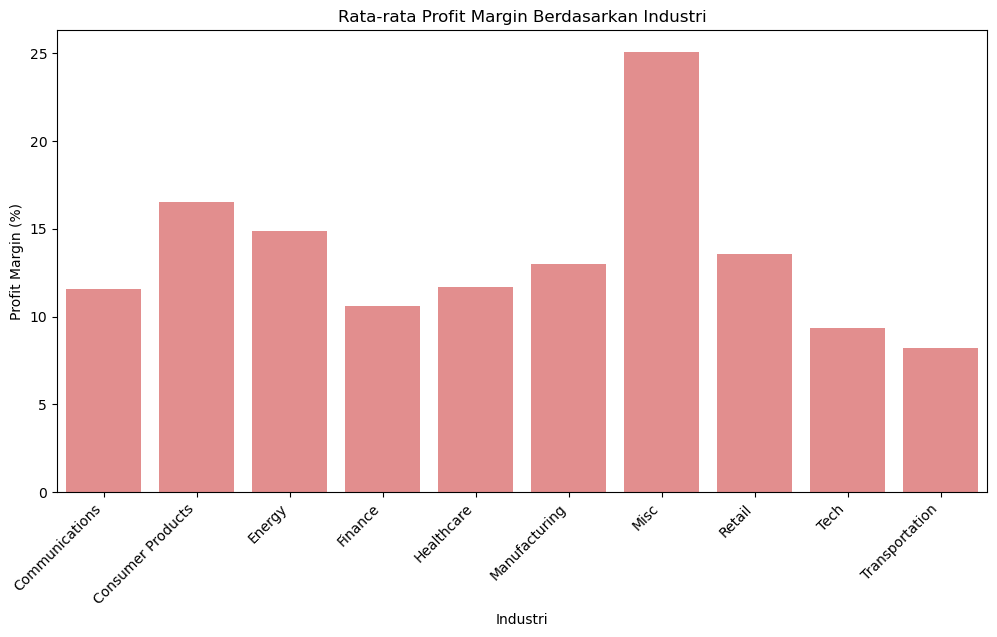

In [53]:
# Hitung rata-rata profit margin per industri
industry_sales['Profit Margin (%)'] = (industry_sales['Profit'] / industry_sales['Sales']) * 100


# Plot rata2 profit margin per industri
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_sales, x='Industry', y='Profit Margin (%)', color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industri')
plt.ylabel('Profit Margin (%)')
plt.title('Rata-rata Profit Margin Berdasarkan Industri')
plt.show()

bisa di lihat diatas bahwa industri **Finance** memiliki total margin profit yang lbih rendah di bandingkan **Consumer Products**, **Energy**, **Healthcare**, dan **Manufacturing**, padahal total sales **Finance** yang pling besar di antara industri lain

untuk memastikan asumsi kita benar mari kita uji statistik menggunakan **ANOVA**

In [54]:
# Filter data bwt spesifik industri
industries_to_compare = ['Consumer Products', 'Energy', 'Healthcare', 'Manufacturing', 'Finance']
filtered_data = df[df['Industry'].isin(industries_to_compare)]

# Pake ANOVA test kalo mau bandingin lebih dari 2 group
anova_results = f_oneway(
    filtered_data[filtered_data['Industry'] == 'Consumer Products']['Profit'],
    filtered_data[filtered_data['Industry'] == 'Energy']['Profit'],
    filtered_data[filtered_data['Industry'] == 'Healthcare']['Profit'],
    filtered_data[filtered_data['Industry'] == 'Manufacturing']['Profit'],
    filtered_data[filtered_data['Industry'] == 'Finance']['Profit']
)

if anova_results.pvalue < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

Terima H0


Terima H0 brati asumsi kita tepat, tidak ada perbedaan yang signifikan antara profit margin dari masing-masing industri.

- Dari grafik profit margin, kita bisa melihat industri dengan margin yang lebih tinggi, seperti **Consumer Products**, **Energy**, **Healthcare**, dan **Manufacturing**. Ini menunjukkan bahwa industri-industri ini mungkin memiliki strategi penjualan yang lebih efisien atau memiliki daya beli yang kuat.
- Sementara itu, industri seperti **Communications**, **Finance** dan **Transportation** memiliki margin lebih rendah, yang bisa menjadi area yang memerlukan evaluasi. Terlebih untuk industri **Finance** karena industri ini justru memiliki kontribus sales yang pling tinggi. Mungkin ada kebutuhan untuk mengurangi diskon atau meningkatkan efisiensi dalam layanan untuk meningkatkan profitabilitas.

#### Analisis Profil Pelanggan Berdasarkan Segment

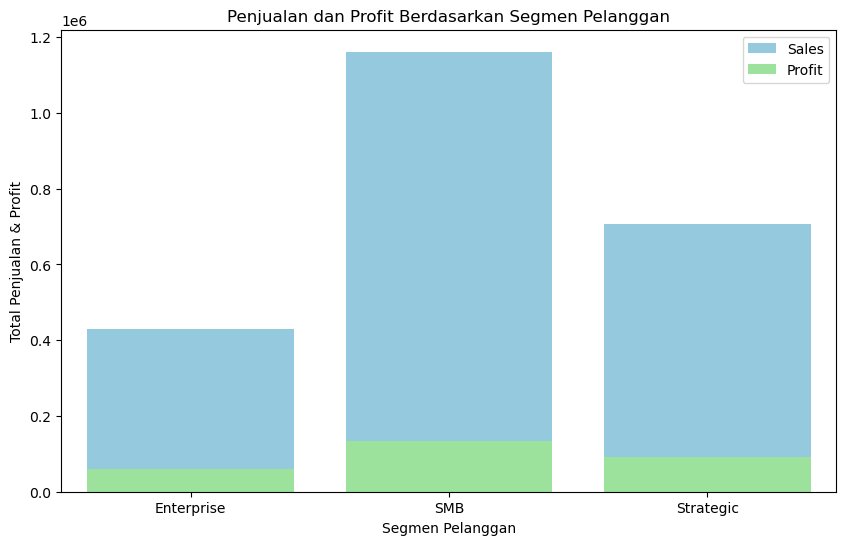

In [55]:
segment_sales = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Plot sales dan profit bedasarkan customer segment
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_sales, x='Segment', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=segment_sales, x='Segment', y='Profit', color='lightgreen', label='Profit')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Total Penjualan & Profit')
plt.title('Penjualan dan Profit Berdasarkan Segmen Pelanggan')
plt.legend()
plt.show()

- Dari grafik segmen pelanggan, segmen SMB (Small and Medium Business) tampaknya memberikan kontribusi penjualan terbesar, tetapi perlu diperhatikan bahwa profit margin untuk segmen ini tidak jauh berbeda dengan segmen lain.
- Ini bisa menjadi peluang untuk mengembangkan strategi yang lebih baik untuk meningkatkan profit dari segmen SMB, seperti menawarkan paket premium atau add-on berbiaya tambahan.

#### Analisis Geografis

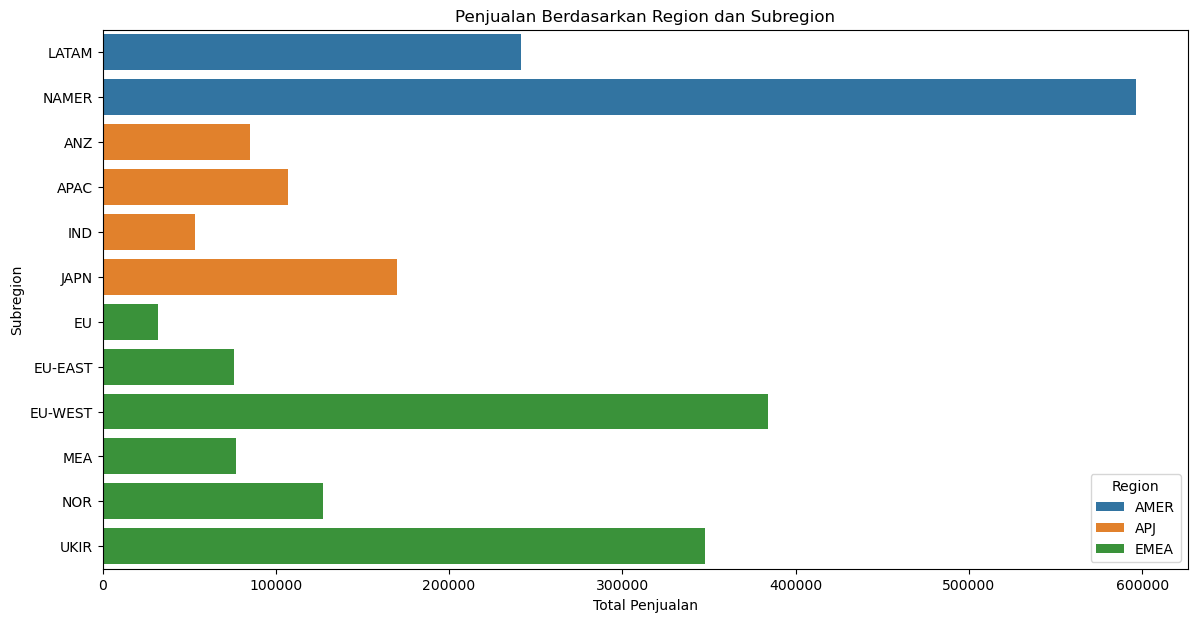

In [56]:
# Plot sales by Region and Subregion without using a map

# Aggregate total sales by Region and Subregion
region_subregion_sales = df.groupby(['Region', 'Subregion']).agg({'Sales': 'sum'}).reset_index()

# Plot total sales by Region and Subregion
plt.figure(figsize=(14, 7))
sns.barplot(data=region_subregion_sales, x='Sales', y='Subregion', hue='Region', dodge=False)
plt.xlabel('Total Penjualan')
plt.ylabel('Subregion')
plt.title('Penjualan Berdasarkan Region dan Subregion')
plt.legend(title='Region')
plt.show()


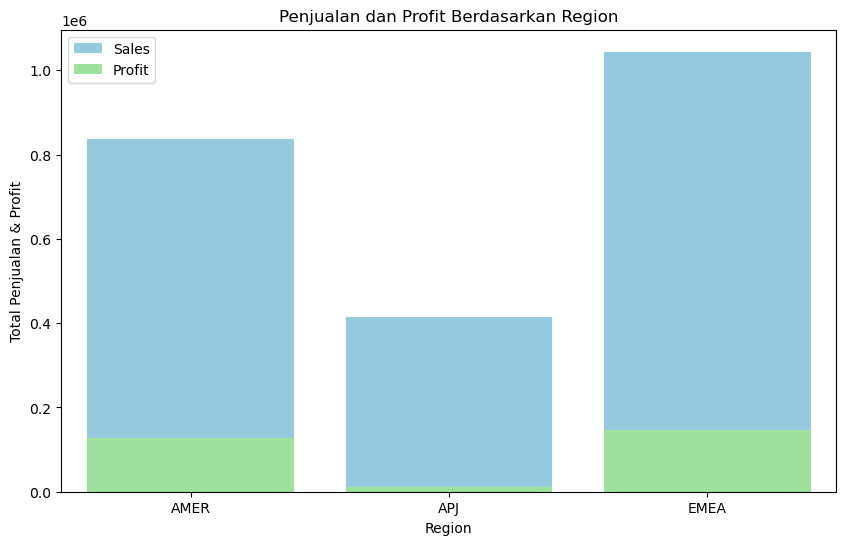

In [57]:
# sum total sales dan profit per region
region_sales_profit = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Plot sales dan profit berdasarkan region
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales_profit, x='Region', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=region_sales_profit, x='Region', y='Profit', color='lightgreen', label='Profit')
plt.xlabel('Region')
plt.ylabel('Total Penjualan & Profit')
plt.title('Penjualan dan Profit Berdasarkan Region')
plt.legend()
plt.show()

- Secara geografis, EMEA memiliki penjualan yang lebih tinggi dibandingkan AMER dan APJ, tetapi tidak jauh berbeda dari segi profitabilitas.
- Untuk wilayah EMEA yang memiliki penjualan tinggi, mungkin ada peluang untuk meningkatkan profitabilitas dengan menyesuaikan strategi harga atau menawarkan layanan tambahan.
- Jika ada rencana untuk ekspansi, mungkin fokus pada AMER dan APJ bisa dipertimbangkan, terutama jika margin profit di wilayah ini bisa ditingkatkan.

### Evaluasi produk populer

**Tujuan**: Mengetahui Produk SaaS mana yang paling populer berdasarkan penjualan atau kuantitas, serta melihat apakah produk populer ini juga memberikan profit yang tinggi.

Langkah-Langkah Analisis:
1. **Identifikasi Produk Berdasarkan Penjualan atau Kuantitas**: Tentukan produk dengan penjualan tertinggi atau kuantitas terbanyak untuk melihat produk yang paling banyak terjual.

2. **Profitabilitas Produk Populer**: Lihat apakah produk populer juga memberikan profit yang tinggi atau jika hanya menarik volume besar tapi profit rendah.

3. **Analisis Diskon pada Produk**: Jika produk banyak didiskon, kita bisa evaluasi apakah diskon memberikan dampak positif pada volume penjualan dan profit.

#### Identifikasi Produk Berdasarkan Penjualan atau Kuantitas

Text(0, 0.5, 'Produk')

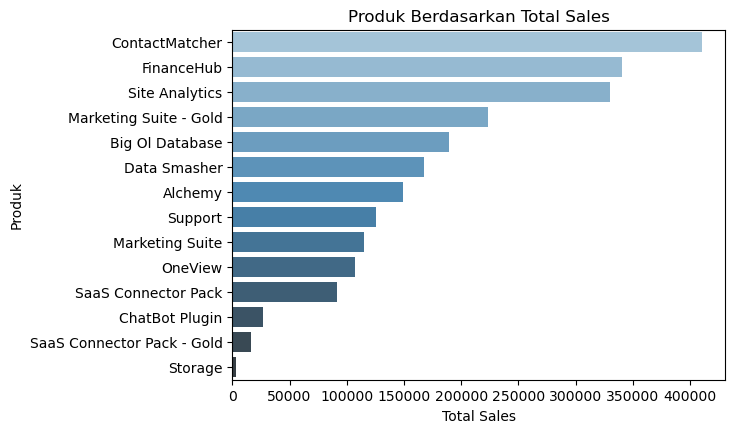

In [58]:
# Aggregate sales, profit, and quantity by product
product_popularity = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount (%)': 'mean',  # rata2 discount per product
    'Profit Margin (%)': 'mean' # rata2 profit margin per product
}).reset_index()

# Sort products by sales and quantity to find the most popular ones
product_popularity_sorted = product_popularity.sort_values(by=['Sales', 'Quantity'], ascending=False)

# Set visualisasi untuk tampilan yang lebih rapi
plt.figure(figsize=(14, 10))

# Visualisasi Produk dengan Total Penjualan Tertinggi
plt.subplot(2, 2, 1)
sns.barplot(data=product_popularity_sorted, x='Sales', y='Product', palette='Blues_d')
plt.title('Produk Berdasarkan Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Produk')

Text(0, 0.5, 'Produk')

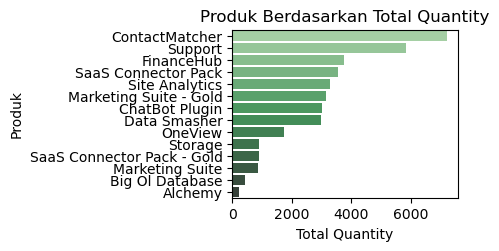

In [59]:
# Visualisasi Produk dengan Total Quantity Terjual Tertinggi
plt.subplot(2, 2, 2)
# Urutkan produk berdasarkan quantity tertinggi
top_quantity = product_popularity_sorted.sort_values('Quantity',ascending=False)
sns.barplot(data=top_quantity, x='Quantity', y='Product', palette='Greens_d')
plt.title('Produk Berdasarkan Total Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('Produk')

Dari visualisasi total sales dan quantity, produk **ContactMatcher**, **FinanceHub**, dan **Site Analytics** merupakan produk dengan penjualan dan volume tertinggi. Ini menunjukkan bahwa produk-produk ini sangat populer di kalangan pelanggan, baik dari segi penjualan maupun volume

#### Profitabilitas Produk Populer

Text(0, 0.5, 'Produk')

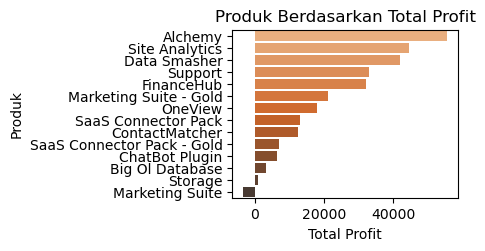

In [60]:
# Visualisasi Produk dengan Total Profit Tertinggi
plt.subplot(2, 2, 3)
# Urutkan produk berdasarkan profit tertinggi
top_profit = product_popularity_sorted.sort_values('Profit',ascending=False)
sns.barplot(data=top_profit, x='Profit', y='Product', palette='Oranges_d')
plt.title('Produk Berdasarkan Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Produk')

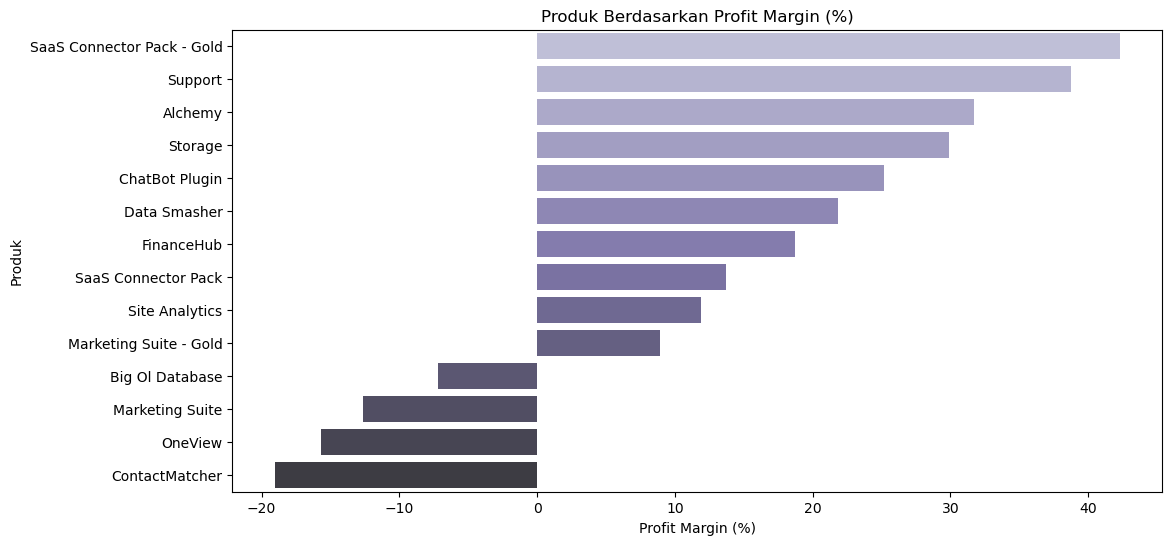

In [61]:
# Profit Margin Produk
plt.figure(figsize=(12, 6))
top_margin = product_popularity_sorted.sort_values('Profit Margin (%)',ascending=False)
sns.barplot(data=top_margin, x='Profit Margin (%)', y='Product', palette='Purples_d')
plt.title('Produk Berdasarkan Profit Margin (%)')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Produk')
plt.show()

Grafik profit menunjukkan bahwa produk seperti **Site Analytics** dan **Alchemy** memiliki total profit tinggi

dari visualisasi di atas bisa dilihat khusus nya untuk 2 product yaitu **Alchemy** & **Data Smasher** miliki efesiensi yang sangat baik, karena memiliki total profit yang tinggi di bandingkan dengan total sales dan quantity yang dihasilkan

secara mengejutkan terilhat ada 3 product yang memiliki total sales yang besar, tapi berbanding terbalik dengan profit yang dihasilkan, bahkan ada yang mengalami kerugian, yaitu **ContactMatcher**, **Big Ol Database**, dan **Marketing Suite - Gold**

#### Analisis Diskon pada Produk

Text(0, 0.5, 'Produk')

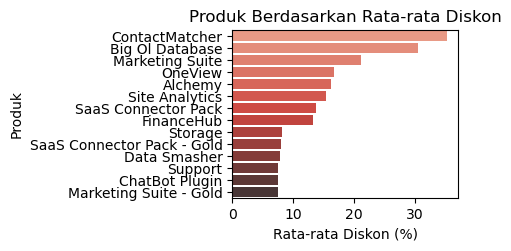

In [62]:
# Visualisasi Produk dengan Rata-rata Diskon Tertinggi
plt.subplot(2, 2, 4)
# Urutkan produk berdasarkan diskon tertinggi
top_discount = product_popularity_sorted.sort_values('Discount (%)',ascending=False)
sns.barplot(data=top_discount, x='Discount (%)', y='Product', palette='Reds_d')
plt.title('Produk Berdasarkan Rata-rata Diskon')
plt.xlabel('Rata-rata Diskon (%)')
plt.ylabel('Produk')

Visualisasi rata-rata diskon menunjukkan produk seperti ContactMatcher dan Big Ol Database memiliki diskon yang lebih tinggi. 

1. **ContactMatcher**:
   - Diskon besar memberikan dorongan signifikan pada total sales, menjadikannya produk dengan total sales tertinggi.
   - Namun, diskon besar ini juga berdampak negatif pada profit, membuat **ContactMatcher** memiliki profit yang relatif rendah dibandingkan produk lain. Hal ini menunjukkan bahwa meskipun produk laris, profitabilitasnya terbatas karena margin yang ditekan oleh diskon.

2. **Big Ol Database**:
   - Meskipun produk ini mendapat diskon besar, hal tersebut tidak terlalu berpengaruh terhadap total sales, yang hanya berada di peringkat ke-5.
   - Ini menunjukkan bahwa diskon saja tidak cukup untuk meningkatkan popularitas produk, mungkin karena faktor lain seperti daya tarik atau kebutuhan pasar yang lebih rendah dibandingkan produk lainnya.

3. **Alchemy & Site Analytics**:
   - Produk ini memiliki diskon yang tidak terlalu besar, namun tetap mampu menghasilkan profit tertinggi. 
   - Penjualan dan kuantitas yang tidak terlalu tinggi, tetapi profit yang optimal, menunjukkan bahwa produk ini efisien dalam menghasilkan profit dan memiliki daya tarik kuat bahkan tanpa diskon besar. Hal ini mencerminkan efisiensi produk, karena mampu menarik pembeli dengan margin yang lebih baik.

apakah karna discount yang besar membuat profit dari product **ContactMatcher**, **Big Ol Database** menjadi rendah? coba kita buat visualisasi untuk melihat hubungan antara diskon dengan profit

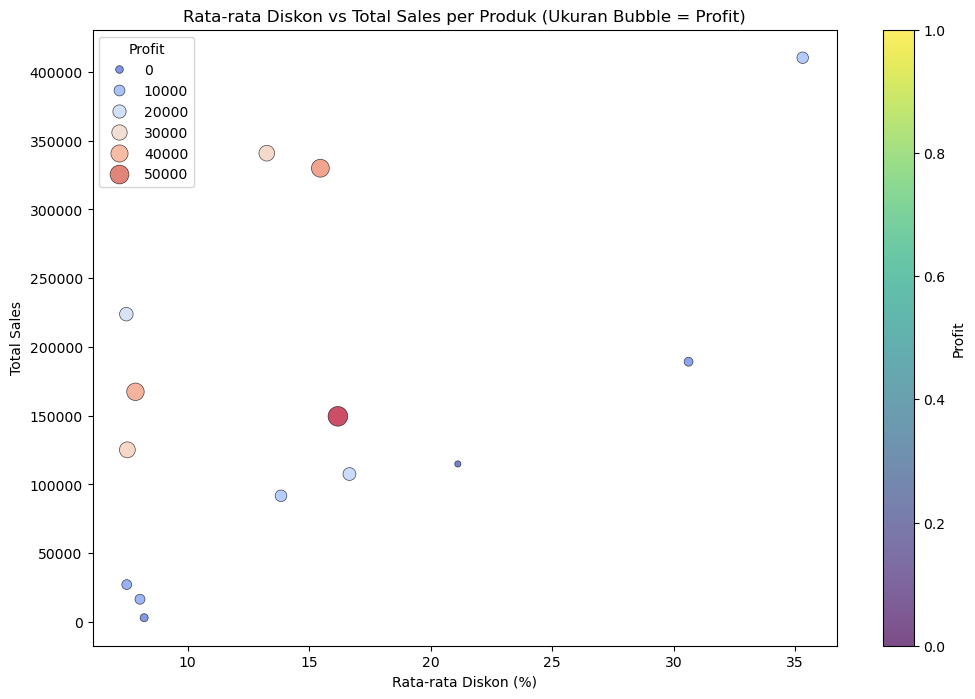

In [63]:
product_discount_sales_profit = product_popularity[['Product', 'Sales', 'Profit', 'Discount (%)']]
product_discount_sales_profit['Profit'] = pd.to_numeric(product_discount_sales_profit['Profit'], errors='coerce')  

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
  data=product_discount_sales_profit, 
  x='Discount (%)', y='Sales', 
  size='Profit', sizes=(20, 200),  # Scale bubble size for better visibility
  hue='Profit', palette='coolwarm', edgecolor='black', linewidth=0.5, alpha=0.7
)

scatter_plot.set_title('Rata-rata Diskon vs Total Sales per Produk (Ukuran Bubble = Profit)')
scatter_plot.set_xlabel('Rata-rata Diskon (%)')
scatter_plot.set_ylabel('Total Sales')
plt.colorbar(scatter_plot.collections[0], label='Profit')  # Add colorbar with label
plt.show()


bisa di lihat dari hasil visualisasi di atas diskon yang besar bisa membuat profit dari product rendah, ini terlihat dari product **ContactMatcher** dan **Big Ol Database** yang memiliki diskon yang besar, tapi profit yang dihasilkan rendah

mari kita uji statistik menggunakan **Pearson Correlation** untuk melihat hubungan antara diskon dengan profit

In [64]:
# Uji korelasi Pearson untuk melihat hubungan linier
correlation_pearson, p_value_pearson = pearsonr(df['Discount (%)'], df['Profit'])

correlation_pearson, p_value_pearson

if p_value_pearson < 0.05:
  print('Tolak H0')
else:
  print('Terima H0')

Tolak H0


dari hasil uji statistik di atas, kita mendapatkan nilai korelasi sebesar -0.6, yang menunjukkan hubungan negatif yang kuat antara diskon dan profit. Ini berarti semakin besar diskon yang diberikan, semakin rendah profit yang dihasilkan. Hal ini sesuai dengan temuan sebelumnya, di mana produk dengan diskon besar seperti **ContactMatcher** dan **Big Ol Database** memiliki profit yang rendah.

## Kesimpulan dan Rekomendasi Strategi Pemasaran dan Produk

### 1. Identifikasi Tren Penjualan
   - **Temuan**: Penjualan SaaS Amazon AWS menunjukkan pola peningkatan signifikan pada bulan September, November, dan Desember, diikuti oleh penurunan pada bulan Januari. Pola ini menunjukkan adanya kecenderungan musiman yang dapat dimanfaatkan.
   - **Rekomendasi**: Merencanakan kampanye promosi intensif menjelang bulan-bulan tersebut dengan fokus pada peningkatan visibilitas dan penawaran khusus di awal kuartal keempat. Melakukan promosi bertema akhir tahun dapat menarik pelanggan baru dan mendorong repeat purchase pada periode puncak ini.

### 2. Analisis Pelanggan Berdasarkan Industri Finance dan Industri Lainnya
   - **Temuan**: Industri *Finance* memiliki total sales yang tinggi namun profit margin yang lebih rendah dibandingkan dengan industri lain, seperti *Consumer Products* atau *Healthcare*, yang memiliki profit margin lebih tinggi meskipun total sales mereka lebih rendah. Hal ini menunjukkan bahwa meskipun *Finance* mendominasi penjualan, kontribusi terhadap profitabilitasnya tidak sebanding.
   - **Rekomendasi**:
      - **Optimasi Struktur Diskon di Industri Finance**: Mengurangi tingkat diskon atau frekuensi promosi di industri *Finance* agar profit margin meningkat, dan menggantikan diskon dengan penawaran nilai tambah seperti layanan premium berbayar.
      - **Penawaran Produk Berfokus pada Nilai Profitabilitas**: Mengembangkan paket produk atau layanan eksklusif yang dirancang khusus untuk industri *Finance*, dengan penekanan pada profitabilitas, seperti fitur tambahan atau layanan dengan biaya tertentu.
      - **Fokus pada Industri dengan Profit Margin Tinggi**: Meningkatkan investasi di industri *Consumer Products*, *Healthcare*, dan *Manufacturing*, yang memiliki profit margin lebih tinggi, serta mengarahkan strategi pemasaran untuk menarik lebih banyak pelanggan dari industri-industri ini.

### 3. Evaluasi Produk Populer
   - **Temuan**: Beberapa produk memiliki volume penjualan tinggi namun profit margin rendah, terutama pada produk dengan diskon besar. Diskon yang tinggi efektif untuk mendorong penjualan pada produk tertentu namun tidak selalu meningkatkan profitabilitas.
   - **Rekomendasi**: Mengevaluasi strategi diskon untuk produk dengan kontribusi profit rendah dan mempertimbangkan pendekatan *bundling* produk sebagai alternatif untuk meningkatkan nilai penawaran tanpa mengurangi profit margin.

Dengan strategi ini, perusahaan dapat memaksimalkan penjualan dan profitabilitas produk SaaS Amazon AWS melalui pendekatan yang lebih terarah berdasarkan kebutuhan pasar dan karakteristik industri.
